<a href="https://colab.research.google.com/github/fabriciosantana/nlp/blob/main/AKCIT_NLP_M11_Colab_Unidade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

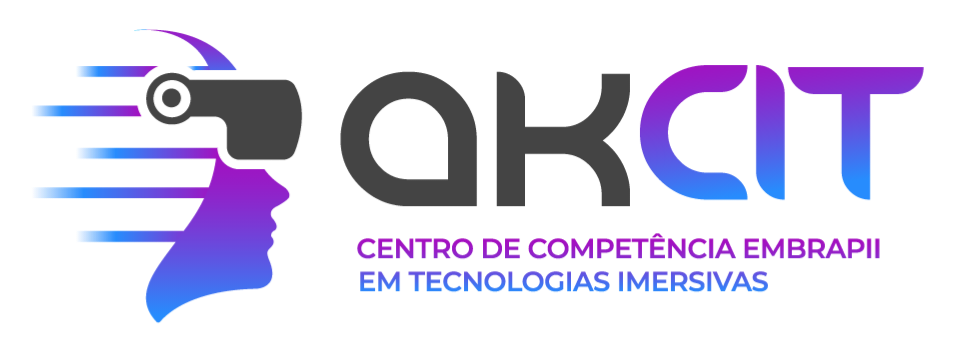


# Identificação

**Microcurso:** Aplicações Emergentes e Imersivas de Modelos de Linguagem

**Docente:** Prof. Dr. Frederico Santos de Oliveira

# Objetivos de Aprendizagem

- Realizar inferências com o modelo LLaMA-3: Utilizar o modelo LLaMA-3 para gerar respostas e realizar análises com base em dados de entrada fornecidos.

- Preparar e estruturar um conjunto de dados para treinamento: Coletar, organizar e pré-processar dados relevantes para garantir a qualidade e a eficácia do treinamento do modelo.

- Executar o *fine-tuning* do modelo: Adaptar o modelo LLaMA-3 a tarefas específicas através do ajuste fino, melhorando seu desempenho em aplicações particulares.

- Salvar e carregar o modelo ajustado: Gerenciar o ciclo de vida do modelo treinado, incluindo o armazenamento seguro e a reutilização eficiente do modelo que passou pelo processo de *fine-tuning*.




# Tópico "Aplicação de LLMs em Ambientes Conversacionais"

O LLaMA-3, desenvolvido pela Meta, representa a mais recente evolução na linha de Modelos de Linguagem de Grande Escala (LLMs) da empresa. Este modelo foi pré-treinado em um conjunto de dados sete vezes maior do que o utilizado em sua versão anterior, o LLaMA-2, incorporando uma quantidade significativamente maior de código e dados de alta qualidade em mais de 30 idiomas. Essa expansão no volume e na diversidade dos dados de treinamento permite que o LLaMA-3 alcance um desempenho superior em tarefas complexas, como geração de código e raciocínio avançado, proporcionando respostas mais precisas e contextualizadas. Além disso, o LLaMA-3 utiliza uma nova técnica de tokenização e ajustes refinados nos parâmetros, otimizando sua capacidade de suportar interações baseadas em chat e janelas de contexto mais longas, o que é essencial para aplicações que exigem um entendimento profundo e contínuo das conversas.

Além das melhorias em seu treinamento e arquitetura, o LLaMA-3 mantém a filosofia de ser uma ferramenta de código aberto, oferecendo aos desenvolvedores maior controle e flexibilidade para personalizar e ajustar o modelo conforme suas necessidades específicas. Essa abertura facilita a adaptação do modelo para uma ampla gama de aplicações, desde ambientes educacionais e de saúde até setores de entretenimento e negócios. A eficiência do LLaMA-3 também é destacada pela sua capacidade de realizar inferências de alta qualidade com um número relativamente menor de parâmetros, graças à qualidade aprimorada de seu conjunto de dados de treinamento. Essas características fazem do LLaMA-3 uma opção altamente competitiva e valiosa para pesquisadores e desenvolvedores que buscam soluções avançadas em processamento de linguagem natural, promovendo a inovação e a colaboração dentro da comunidade de inteligência artificial.

Nesta atividade prática, vamos realizar todos os passos necessários para customização do modelo Llama-3: (1) preparação do ambiente,  (2) preparação dos dados, (3) inferência do modelo, (3) customização do modelo,(4) exportação do modelo, afim de utilizá-lo em produção (por exemplo, para Llama.cpp).

Para começar, após conectar em uma instância gratuita do Google Colab com Tesla T4 (GPU Tesla T4 - placa gráfica da NVIDIA projetada para aceleração de tarefas como *deep learning* e processamento de dados), você pode ou clicar individualmente em cada célula para execução, ou, no menu principal, clicar em "Ambiente de Execução" e depois em "Executar Tudo".

Se quiser instalar o ambiente no seu próprio computador, é recomendável seguir as instruções na página oficial do Github [neste link](https://github.com/unslothai/unsloth?tab=readme-ov-file#-installation-instructions).


Divirta-se! 😊



# Preparação do Ambiente

Nesta etapa, vamos instalar todos os requisitos e preparar o ambiente para utilização do Unsloth. Basta executar a célula a seguir:

In [ ]:
# %%capture: O comando %%capture é utilizado no Jupyter Notebook ou Colab para capturar a saída de execução da célula.
# Isso é útil para evitar que a saída do terminal (como mensagens de instalação) seja exibida no notebook.
%%capture

# Instala a biblioteca 'unsloth' via pip
# 'unsloth' é uma ferramenta que provavelmente ajuda com tarefas específicas (por exemplo, no processamento de dados ou aprendizado de máquina)
!pip install unsloth

# Desinstala a versão existente de 'unsloth' (se houver) e instala a versão mais recente do pacote diretamente do repositório GitHub.
# A opção '-y' força a desinstalação sem pedir confirmação do usuário.
# A instalação é feita com a flag '--upgrade' para garantir que a versão mais recente seja instalada.
# 'unsloth[colab-new]' parece ser uma versão especial ou dependências adicionais específicas para uso no Google Colab.
# A URL do repositório GitHub é especificada para instalar diretamente da fonte.
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"


# Carregamento do Modelo

O próximo passo é carregar o modelo. Para isso vamos utilizar a classe "FastLanguageModel", do Unsloth. Assim teremos vários modelos à disposição, para inferência e treinamento. Vamos utilizar o modelo "Meta-Llama-3.1-8B", atribuindo-o no atributo "model_name" no FastLanguageModel.

In [ ]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 2048  # Escolha qualquer valor! Unsloth suporta o RoPE Scaling internamente!
dtype = None  # None para detecção automática. Float16 para Tesla T4, V100, Bfloat16 para Ampere+
load_in_4bit = True  # Use quantização de 4 bits para reduzir o uso de memória. Pode ser False.

# Modelos pré-quantizados de 4 bits que Unsloth suporta para download 4x mais rápido + sem OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Modelo Llama-3.1 de 15 trilhões de tokens 2x mais rápido!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # Também envia 4 bits para 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # Novo Mistral 12b 2x mais rápido!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x mais rápido!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x mais rápido!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x mais rápido!
] # Mais modelos em https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use um se estiver usando modelos protegidos como meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.14: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

A seguir, uma explicação das configurações usadas no código acima:

**Definição de Parâmetros**

- Comprimento Máximo da Sequência (max_seq_length): Configuramos o comprimento máximo da sequência para 2048 tokens. Você pode ajustar este valor conforme necessário.
- Tipo de Dado (dtype): Definimos o tipo de dado como None para detecção automática, mas pode ser ajustado para *Float16* para GPUs Tesla T4 e V100, ou *Bfloat16* para GPUs Ampere+.
- Quantização em 4 Bits (load_in_4bit): Ativamos a quantização em 4 bits para reduzir o uso de memória. Isso pode ser desativado se necessário.

**Modelos Pré-Quantizados em 4 Bits** (fourbit_models):
São listados vários modelos que já estão quantizados em 4 bits. Esses modelos são mais rápidos para baixar e usam menos memória.

**Carregamento do Modelo**

Utilizamos a função *from_pretrained* para carregar o modelo de linguagem  pré-treinado e o seu tokenizer. Você pode escolher qualquer modelo da lista ou outros disponíveis na página do Hugging Face da Unsloth.



# Inferência do Modelo

Feito o carregamento do modelo para memória, podemos fazer um teste utilizando o modelo pré-treinado. Para isso, vamos definir um *prompt*, que deve conter um campo para a "Instruction", outro para o "Input", e a "Response", que é o formato utilizado para treinamento. Portanto, mesmo que não tenhamos um "Input" ou "Response", o prompt deve seguir esse formato.

In [ ]:
prompt = """Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
{}

### Entrada:
{}

### Resposta:
{}"""

In [ ]:
FastLanguageModel.for_inference(model) # Habilita inferência nativa 2x mais rápida
inputs = tokenizer(
[
    prompt.format(
        "Quem descobriu o Brasil?", # instrução
        "", # entrada
        "", # saída - deixe em branco para geração!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.\nEscreva uma resposta que complete adequadamente a solicitação.\n\n### Instrução:\nQuem descobriu o Brasil?\n\n### Entrada:\n\n\n### Resposta:\nPedro Álvares Cabral\n<|end_of_text|>']

## Exercício 1: Faça alguns testes que achar interessante, alterando a "Instruction" e o "Input". Por exemplo:

In [ ]:
FastLanguageModel.for_inference(model) # Habilita inferência nativa 2x mais rápida
inputs = tokenizer(
[
    prompt.format(
        "Traduza o seguinte texto para o inglês:", # instrução
        "Brasil (localmente [bɾaˈziw][b]), oficialmente República Federativa do Brasil, é o maior país da América do Sul e da região da América Latina, sendo o quinto maior do mundo em área territorial (equivalente a 47,3% do território sul-americano), com 8 510 417,771 km², e o sétimo em população (com 203 milhões de habitantes, em agosto de 2022).", # entrada
        "", # saída - deixe em branco para geração!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.\nEscreva uma resposta que complete adequadamente a solicitação.\n\n### Instrução:\nTraduza o seguinte texto para o inglês:\n\n### Entrada:\nBrasil (localmente [bɾaˈziw][b]), oficialmente República Federativa do Brasil, é o maior país da América do Sul e da região da América Latina, sendo o quinto maior do mundo em área territorial (equivalente a 47,3% do território sul-americano), com 8 510 417,771 km², e o sétimo em população (com 203 milhões de habitantes, em agosto de 2022).\n\n### Resposta:\nBrazil (locally [bɾaˈziw][b]), officially the Federative Republic of Brazil, is the largest country in South America and the region of Latin America, being the fifth largest in the world in territorial area (equivalent to 47.3% of the South American territory), with']

# Pré-Processamento dos Dados

Agora vamos utilizar o conjunto de dados "Superset", que contém instruções em português, para realizar o ajuste fino do modelo.

O código a seguir ajuda a configurar e formatar dados de treino. O formato esperado pelo modelo deve conter três campos: "Instruction", "Input" e "Response", e conjunto de dados Superset possui apenas os campos “Instruction” e “Output”. Precisamos ajustar o conjunto de dados para esse formato.



**2 - Função de Formatação dos Prompts**

Definimos uma função chamada formatting_prompts_func que aplica o template de conversação nos exemplos de dados.

- formatting_prompts_func: Esta função pega as conversas dos exemplos, aplica o template de conversação usando o tokenizer, e retorna os textos formatados.

**3 - Carregamento e Formatação do Dataset**

Carregamos o dataset chamado  *superset* e aplicamos a função de formatação a ele.

- load_dataset: Carrega o dataset "superset" disponível no huggingface.
- dataset.map: Aplica a função de formatação aos dados do dataset de forma *batched* (em lotes).

In [ ]:
from datasets import load_dataset

# Carregando o dataset
dataset = load_dataset("rhaymison/superset", split="train")

# Adicionando campo 'input' vazio a cada entrada
def add_empty_input(examples):
    examples["input"] = [""] * len(examples["instruction"])  # Supõe-se que 'instruction' (instrução) é sempre presente
    return examples

# Mapeando a função para adicionar o campo 'input'
dataset = dataset.map(add_empty_input, batched=True)

# Definição do prompt e token EOS
alpaca_prompt = """Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
{}

### Entrada:
{}

### Resposta:
{}"""

def formatting_prompts_func(examples):
    instructions = examples["instruction"] # instruções
    inputs = examples["input"] # entradas
    outputs = examples["output"] # saídas
    texts = []
    for instruction, inp, output in zip(instructions, inputs, outputs):
        text = alpaca_prompt.format(instruction, inp, output) + tokenizer.eos_token
        texts.append(text)
    return {"text": texts}

# Mapeando a função de formatação para o dataset
dataset = dataset.map(formatting_prompts_func, batched=True)

README.md:   0%|          | 0.00/342 [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/209M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/262M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/263M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/637097 [00:00<?, ? examples/s]

Map:   0%|          | 0/637097 [00:00<?, ? examples/s]

Map:   0%|          | 0/637097 [00:00<?, ? examples/s]

Vamos verificar algumas amostras presentes no dataset:

In [ ]:
# Para verificar um exemplo formatado
print(dataset[0]['text'])

Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
Dê três dicas para se manter saudável. 

### Entrada:


### Resposta:
1. Coma uma dieta equilibrada e nutritiva: Certifique-se de que suas refeições incluam uma variedade de frutas e vegetais, proteínas magras, grãos integrais e gorduras saudáveis. Isso ajuda a fornecer ao seu corpo os nutrientes essenciais para funcionar no seu melhor e pode ajudar a prevenir doenças crônicas.

2. Envolver-se em atividade física regular: o exercício é crucial para manter ossos fortes, músculos e saúde cardiovascular. Aponte para pelo menos 150 minutos de exercício aeróbico moderado ou 75 minutos de exercício vigoroso a cada semana.

3. Dormir o suficiente: dormir com qualidade suficiente é crucial para o bem-estar físico e mental. Ajuda a regular o humor, melhorar a função cognitiva e apoia o crescimento saudável e 

In [ ]:
# Para verificar um exemplo formatado
print(dataset[1]['text'])

Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
Quais são as três cores primárias? 

### Entrada:


### Resposta:
As três cores primárias são vermelho, azul e amarelo. Essas cores são chamadas primárias porque não podem ser criadas misturando outras cores e todas as outras cores podem ser feitas combinando-as em várias proporções. No sistema de cores aditivas, usado para a luz, as cores primárias são vermelho, verde e azul (RGB).<|end_of_text|>


In [ ]:
# Para verificar um exemplo formatado
print(dataset[2]['text'])

Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
Descreva a estrutura de um átomo. 

### Entrada:


### Resposta:
Um átomo é o bloco básico de construção de toda a matéria e é composto por três tipos de partículas: prótons, nêutrons e elétrons. A estrutura de um átomo pode ser descrita como um núcleo no centro cercado por uma nuvem de elétrons.

O núcleo de um átomo é composto de prótons e nêutrons. Os prótons são partículas carregadas positivamente e os nêutrons são partículas neutras sem carga. Ambas as partículas estão localizadas no núcleo do átomo, que está no centro do átomo e contém a maior parte da massa do átomo.

Ao redor do núcleo do átomo está uma nuvem de elétrons. Os elétrons são partículas carregadas negativamente que estão em constante movimento ao redor do núcleo. A nuvem de elétrons é dividida em camadas ou orbitais, e cada camada

# Preparação para Treinamento

Agora vamos adicionar os adaptadores LoRA, e assim não precisaremos treinar todo o modelo, mas atualizar apenas 1 a 10% de todos os parâmetros! (Consulte a Seção Saiba Mais da unidade para mais informações sobre LoRA).

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Escolha qualquer número > 0! Sugerido 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Suporta qualquer valor, mas = 0 é otimizado
    bias = "none",    # Suporta qualquer valor, mas = "none" é otimizado
    # [NOVO] "unsloth" usa 30% menos VRAM, cabe tamanhos de lote 2x maiores!
    use_gradient_checkpointing = "unsloth", # True ou "unsloth" para contexto muito longo
    random_state = 3407,
    use_rslora = False,  # Unsloath suporta LoRA com estabilização de rank
    loftq_config = None, # E LoftQ
)

Unsloth 2025.3.14 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


 **Carregamento do Modelo**:

Utilizamos a função *get_peft_model* da biblioteca *FastLanguageModel* para ajustar o modelo que carregamos anteriormente. Este ajuste permite que o modelo utilize técnicas de eficiência de parâmetros finos (PEFT).

**Definição dos Parâmetros**:

- r = 16: Este é um parâmetro que você pode ajustar para controlar a capacidade do modelo. Valores comuns são 8, 16, 32, 64, 128.
- target_modules: Lista dos módulos do modelo que serão ajustados. Inclui projeções como "q_proj", "k_proj", "v_proj", etc.
- lora_alpha = 16: Controla a escala dos ajustes.
- lora_dropout = 0: Definido como 0 para otimização, mas pode ser ajustado conforme necessário.
- bias = "none": Otimizado para não usar bias, mas pode ser configurado de outra forma.
- use_gradient_checkpointing = "unsloth": Utiliza um método especial chamado "unsloth" que economiza até 30% de memória e permite tamanhos de batch maiores.
- random_state = 3407: Define o estado aleatório para garantir reprodutibilidade.
- use_rslora = False: Define se deve usar uma técnica chamada LoRA estabilizada por rank. Atualmente definido como False.
- loftq_config = None: Configuração para LoftQ, uma técnica adicional que não está sendo usada aqui.

# **Treinamento do Modelo**
Agora vamos usar o *SFTTrainer* do Huggingface TRL! Se estive interessado nos detalhes dessa classe, verifique a documentação aqui: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer).

Vamos definir que o modelo seja treinado por no máximo 60 *steps*, para acelerar as coisas. Mas ao treinar o seu modelo final, você pode definir num_train_epochs=1 para uma execução completa e desativar max_steps=None.

In [ ]:
NUM_TRAIN_EPOCHS=0
MAX_STEPS=60

# Descomente as linhas a seguir para um treinamento completo
# NUM_TRAIN_EPOCS=1
# MAX_STEPS=None

# 1 - Importações
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

# 2 - Configuração do SFTTrainer
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Pode tornar o treinamento 5x mais rápido para sequências curtas.
    # 3 - Argumentos de Treinamento
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        num_train_epochs=NUM_TRAIN_EPOCHS,
        max_steps = MAX_STEPS,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/637097 [00:00<?, ? examples/s]

*A* seguir, temos uma descrição de cada parte do código:

**1 - Importações**

Primeiro, importamos as classes e funções necessárias:

- SFTTrainer é a classe usada para o treinamento.
- TrainingArguments define os argumentos de treinamento.
- is_bfloat16_supported verifica se o tipo de dado bfloat16 é suportado.

**2 - Configuração do SFTTrainer**

Criamos uma instância do SFTTrainer com os parâmetros e argumentos de treinamento. Vamos ver o que cada parâmetro faz:

- model: O modelo que você quer treinar.
- tokenizer: O tokenizer para preparar os dados de entrada.
- train_dataset: O conjunto de dados de treinamento.
- dataset_text_field: O campo do texto nos dados, aqui é "text".
- max_seq_length: O comprimento máximo da sequência.
- dataset_num_proc: Número de processos para carregar os dados.
- packing: Se verdadeiro, pode acelerar o treinamento para sequências curtas.

**3 - Argumentos de Treinamento (TrainingArguments)**

Configuramos diversos parâmetros para o treinamento:

- per_device_train_batch_size = 2: Tamanho do lote por dispositivo (GPU/CPU).
- gradient_accumulation_steps = 4: Número de passos para acumulação de gradiente antes de atualizar os pesos do modelo.
- warmup_steps = 5: Número de passos de aquecimento (*warmup* - refere-se ao número inicial de passos de treinamento durante os quais a taxa de aprendizado é gradualmente aumentada até atingir um valor máximo) para a taxa de aprendizado.
- max_steps = 60: Número máximo de passos de treinamento.
- learning_rate = 2e-4: Taxa de aprendizado usada pelo otimizador.
- fp16 = not is_bfloat16_supported(): Usa precisão de ponto flutuante de 16 bits (fp16) se bfloat16 não for suportado.
- bf16 = is_bfloat16_supported(): Usa bfloat16 se suportado pelo hardware.
- logging_steps = 1: Frequência de registro de logs durante o treinamento.
- optim = "adamw_8bit": Otimizador usado, aqui "adamw_8bit" para eficiência de memória.
- weight_decay = 0.01: Taxa de decaimento de peso para regularização.
- lr_scheduler_type = "linear": Tipo de agendador de taxa de aprendizado.
- seed = 3407: Semente aleatória para garantir reprodutibilidade dos resultados.
- output_dir = "outputs": Diretório onde os resultados do treinamento serão salvos.

## Informações de uso de Memória de GPU

O código a seguir é uma maneira prática de monitorar o uso de memória da sua GPU. Ele informa a quantidade total de memória da GPU e a quantidade de memória que foi reservada até o momento. Isso é útil para garantir que você está usando os recursos da GPU de maneira eficiente e para evitar problemas de falta de memória durante o treinamento de modelos.

In [ ]:
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Memória máxima = {max_memory} GB.")
print(f"{start_gpu_memory} GB de memória reservados.")

GPU = Tesla T4. Memória máxima = 14.741 GB.
5.938 GB de memória reservados.


## Iniciar Treinamento

O código a seguir é uma linha simples, mas muito importante. Ela inicia o processo de treinamento do modelo utilizando o objeto *trainer* que foi configurado anteriormente. Se você manteve MAX_STEPS=60, o treinamento deve levar cerca de 20 minutos em um gpu Tesla T4.

Durante o treinamento são impressas as informações referentes à função *loss* (de perda) a cada *step*. Não necessariamente a *loss* vai diminuir a cada *step*, pois o modelo é treinado com apenas duas amostras por *step*, e o gradiente é acumulado por 4 *steps*, o que simula um *batch size* (determina o número de amostras, ou exemplos processados pelo modelo antes que os pesos sejam atualizados) igual a 8. Portanto os pesos são atualizadas apenas após 4 *steps*.

Aproveite esse tempo para apreciar uma xícara de café...

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 637,097 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: freds0 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.021700
2,1.775500
3,1.748500
4,1.482400
5,1.849300
6,1.796300
7,1.862300
8,1.729600
9,1.638600
10,1.314900


## Informações de Uso de Memória de GPU pós-treino

Este código mostra as estatísticas finais de memória e tempo após o treinamento do modelo. Ele calcula a quantidade de memória da GPU usada e o tempo total de treinamento, e imprime essas informações de forma organizada.

In [ ]:
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} segundos usados para treinamento.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutos usados para treinamento.")
print(f"Pico de memória reservada = {used_memory} GB.")
print(f"Pico de memória reservada para treinamento = {used_memory_for_lora} GB.")
print(f"Pico de memória reservada % da memória máxima = {used_percentage} %.")
print(f"Pico de memória reservada para treinamento % da memória máxima = {lora_percentage} %.")

1248.1824 segundos usados para treinamento.
20.8 minutos usados para treinamento.
Pico de memória reservada = 7.74 GB.
Pico de memória reservada para treinamento = 1.802 GB.
Pico de memória reservada % da memória máxima = 52.507 %.
Pico de memória reservada para treinamento % da memória máxima = 12.224 %.


# Realizar Inferência com o Modelo Customizado

Após realizarmos o treinamento do modelo, podemos realizar a inferência utilizando o modelo ajustado no nosso conjunto de dados.

In [ ]:
FastLanguageModel.for_inference(model) # Habilita inferência nativa 2x mais rápida
inputs = tokenizer(
[
    prompt.format(
        "Quais os nomes dos presidentes do Brasil?", # instrução
        "", # entrada
        "", # saída - deixe em branco para geração!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.\nEscreva uma resposta que complete adequadamente a solicitação.\n\n### Instrução:\nQuais os nomes dos presidentes do Brasil?\n\n### Entrada:\n\n\n### Resposta:\nOs nomes dos presidentes do Brasil desde a independência em 1822 até hoje são os seguintes:\n\n1. Dom Pedro I (1822-1831)\n2. Dom Pedro II (1831-1889)\n3. Floriano Peixoto (1891-1894)\n4. Pr']

# Salvando/Carregando o modelo em Disco

Para salvar o modelo final com os adaptadores LoRA, você pode utilizar a função "push_to_hub" do Huggingface para salvar seu modelo de forma online. Outra opção é utilizar a função "save_pretrained" para salvar o modelo localmente.

[NOTA] Isso salva SOMENTE os adaptadores LoRA e não o modelo completo.

In [ ]:
model.save_pretrained("lora_model") # Armazenamento Local
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Armazenamento Online (requer token do Hugging Face Hub)
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Armazenamento Online (requer token do Hugging Face Hub)

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

Dessa forma, os adaptadores LoRA encontram-se salvos na pasta "lora_model". Vamos apagar o modelo que encontra-se em memória:

In [ ]:
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Memória máxima = {max_memory} GB.")
print(f"{start_gpu_memory} GB de memória reservados.")

GPU = Tesla T4. Memória máxima = 14.741 GB.
7.74 GB de memória reservados.


In [ ]:
#  Limpa a memória, tanto a memória RAM principal
# (ao deletar as referências a model, tokenizer e, opcionalmente, dataset)
# quanto a memória da GPU (com torch.cuda.empty_cache()).
if True:
    del model; del tokenizer; #del dataset
    torch.cuda.empty_cache()

In [ ]:
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Memória máxima = {max_memory} GB.")
print(f"{start_gpu_memory} GB de memória reservados.")

GPU = Tesla T4. Memória máxima = 14.741 GB.
7.74 GB de memória reservados.


Precisamos definir o número de bits para carregamento do modelo:


In [ ]:
from transformers import BitsAndBytesConfig

config = BitsAndBytesConfig(
    load_in_8bit_fp32_cpu_offload=True
)
device_map = {
  "": "cuda",  # Carrega o modelo principal na GPU
}

In [ ]:
if True:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # O modelo que voce usou para o treinamento
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
        quantization_config=config,
        device_map=device_map

    )
    FastLanguageModel.for_inference(model) # Habilita a inferencia nativa 2x mais rápida


==((====))==  Unsloth 2025.3.14: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:
prompt = """Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
{}

### Entrada:
{}

### Resposta:
{}"""

inputs = tokenizer(
[
    prompt.format(
        "Qual o relógio mais importante em Londres?", # instrução
        "", # entrada
        "", # saída - deixe em branco para geração!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<|begin_of_text|>Abaixo está uma instrução que descreve uma tarefa, juntamente com uma entrada que fornece contexto adicional.
Escreva uma resposta que complete adequadamente a solicitação.

### Instrução:
Qual o relógio mais importante em Londres?

### Entrada:


### Resposta:
O relógio mais importante em Londres é o Big Ben, que é o relógio mais famoso e icônico da cidade. Localizado no topo da Torre do Parlamento, o Big Ben é um relógio de 13 toneladas e 7 metros de altura, e é o maior relógio de torre do mundo. O Big Ben toca a hora a cada quarto e meia, e é um símbolo da cidade e do Reino Unido.<|end_of_text|>


# Referencias

- https://medium.com/kinomoto-mag/fine-tuning-llama-3-with-unsloth-79c3465ef3e3
- https://github.com/unslothai/unsloth
- https://huggingface.co/blog/mlabonne/sft-llama3

